# Capstone Project
## 1. Introduction
// content

## 2. Dataset

In [1]:
#%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score, classification_report, accuracy_score
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [3]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


## 3. Data Preprocessing

In [4]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [5]:
sum(df.duplicated())

0

In [6]:
df.dropna(inplace = True)
df.drop('id', axis = 1, inplace=True)

Using decision tree to fill in the missing values

In [7]:
# bmi_pipe = Pipeline(steps=[('scale',StandardScaler()), ('lr',DecisionTreeRegressor(random_state=42))])
# X = df[['age','gender','bmi']].copy()
# X.gender = X.gender.replace({'Male':0,'Female':1,'Other':2}).astype(np.uint8)
# missing_values = X[X.bmi.isna()]
# X = X[~X.bmi.isna()]
# y = X.pop('bmi')
# bmi_pipe.fit(X,y)
# predicted_bmi = pd.Series(bmi_pipe.predict(missing_values[['age','gender']]), index=missing_values.index)
# df.loc[missing_values.index,'bmi'] = predicted_bmi

In [8]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

Replace instances' string to numerical

In [9]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
gender=enc.fit_transform(df['gender'])
smoking_status=enc.fit_transform(df['smoking_status'])
work_type=enc.fit_transform(df['work_type'])
Residence_type=enc.fit_transform(df['Residence_type'])
ever_married=enc.fit_transform(df['ever_married'])
df['work_type']=work_type
df['ever_married']=ever_married
df['Residence_type']=Residence_type
df['smoking_status']=smoking_status
df['gender']=gender
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1
5,1,81.0,0,0,1,2,1,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,0,13.0,0,0,0,4,0,103.08,18.6,0,0
5106,0,81.0,0,0,1,3,1,125.20,40.0,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.6,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.6,1,0


In [10]:
X = df.iloc[:, df.columns != 'stroke']
y = df['stroke']

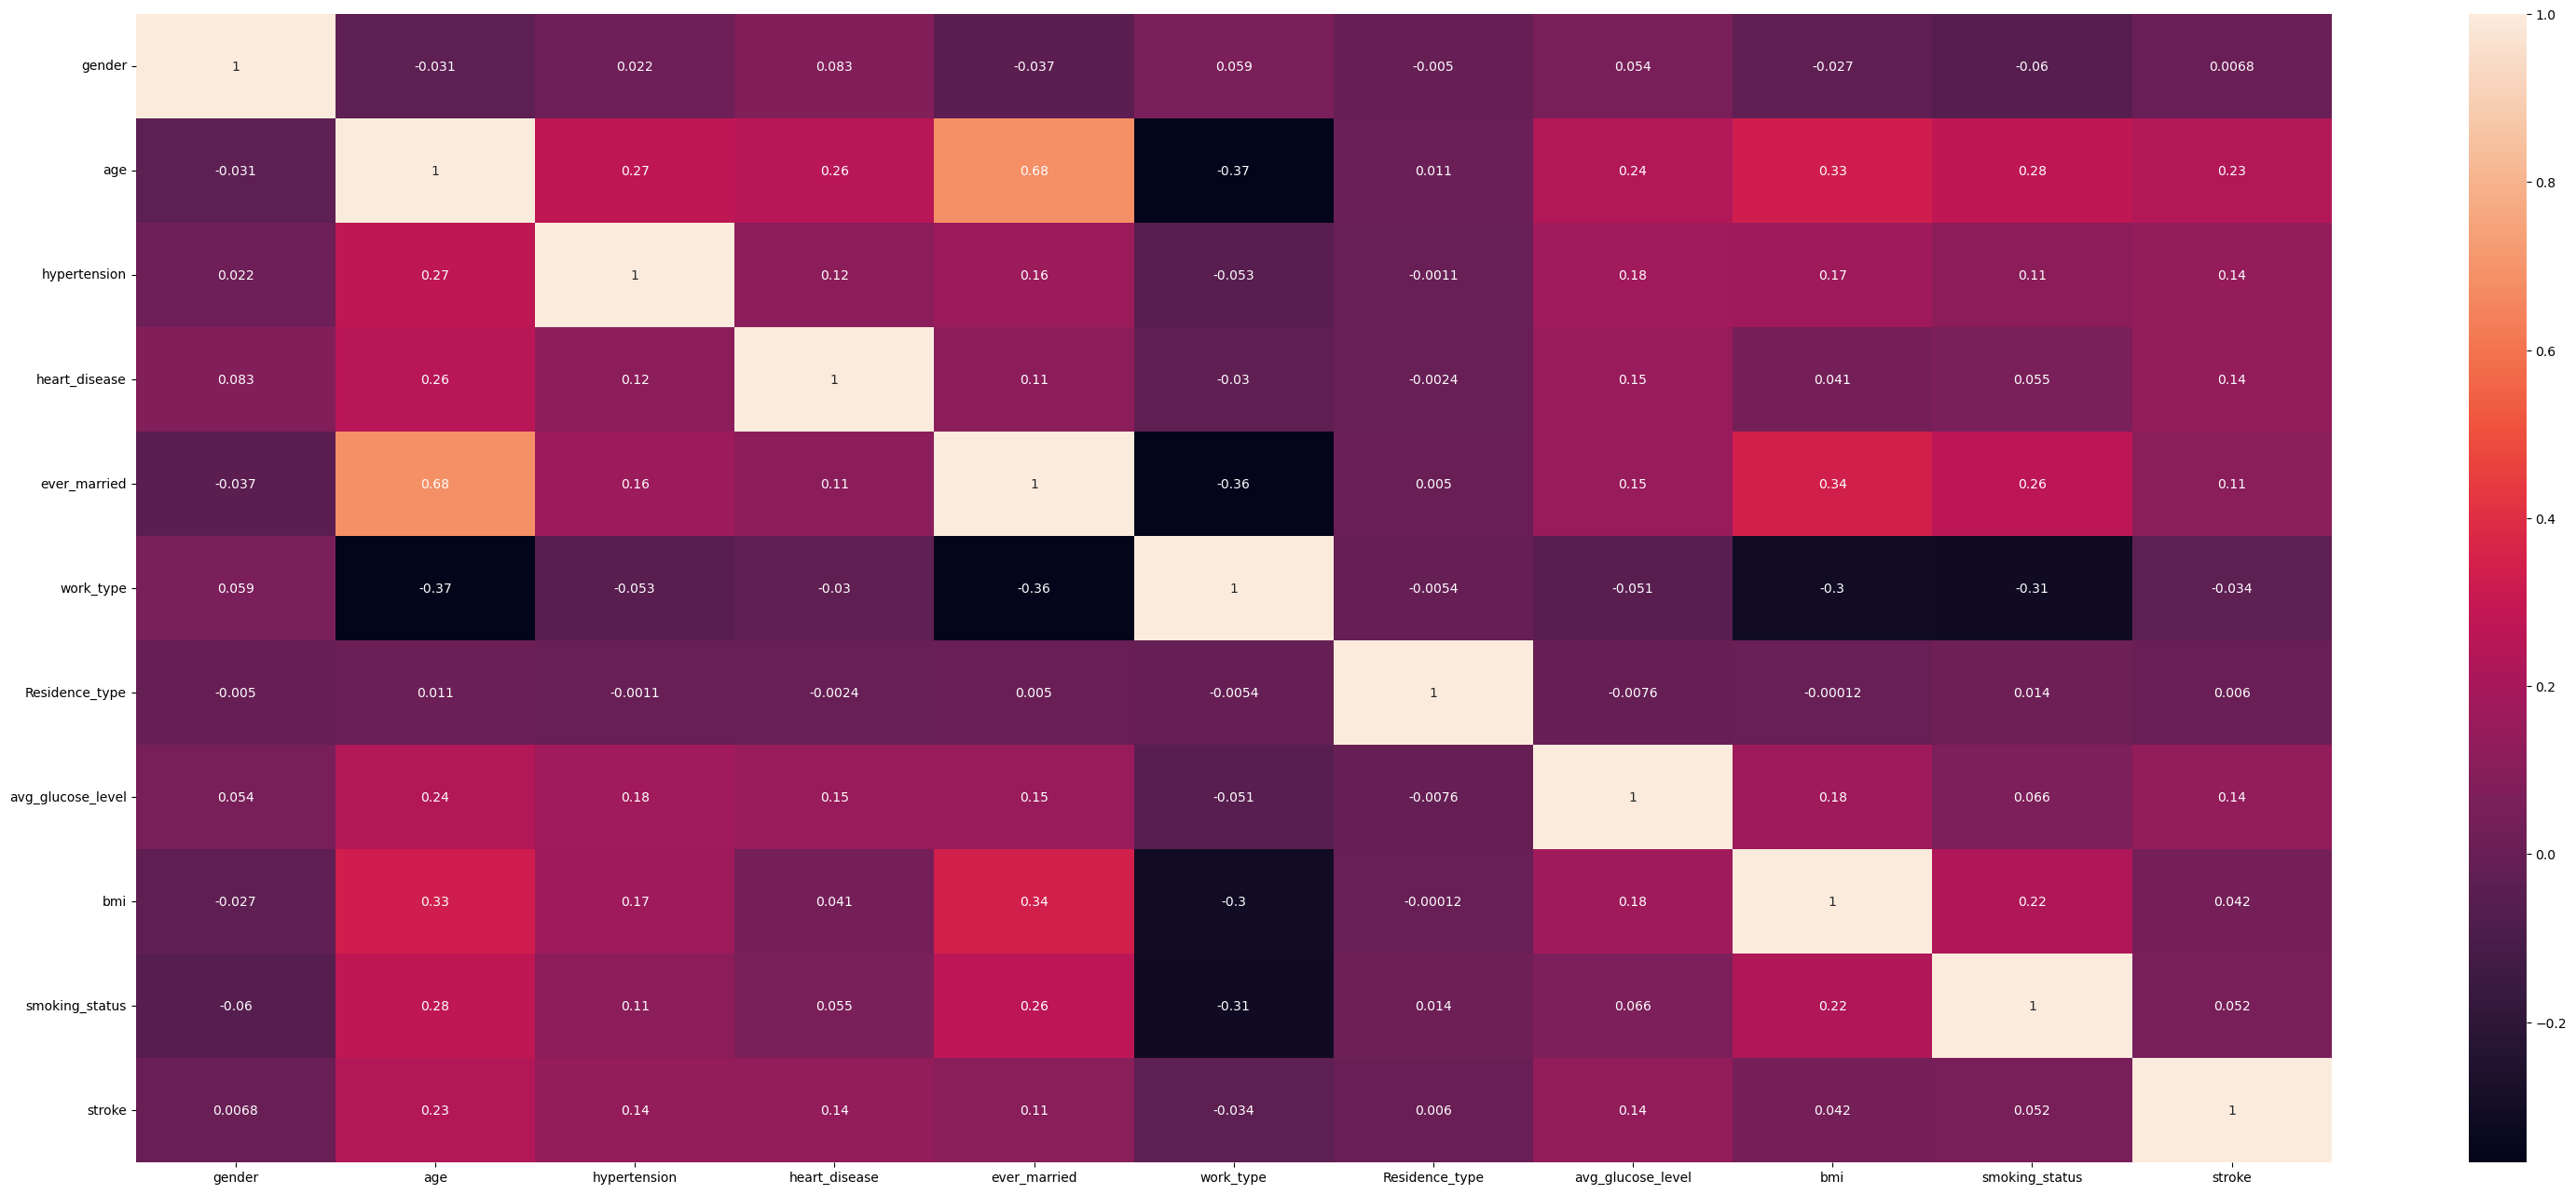

In [11]:
plt.figure(figsize = (38, 16))
sns.heatmap(df.corr(), annot = True)
plt.show()

## 4. Models

### Naive Bayes

In [12]:
def run_logistic_regression(df,seed):
    #get the data
    y = df.iloc[:,df.columns == 'stroke']
    X = df.iloc[:, df.columns != 'stroke']
    #split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=seed, stratify=y)
    scaler = preprocessing.StandardScaler().fit(X_train)
    #scale data for better results
    X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)
    X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
    #train a model
    model = LogisticRegression();
    model.fit(X_train_scaled, y_train)
    train_accuracy = model.score(X_train_scaled, y_train)
    print(f'The accuracy for the training set is {100 * train_accuracy:.2f}%')
    test_accuracy = model.score(X_test_scaled, y_test)
    print(f'The accuracy for the test set is {100 * test_accuracy:.2f}%')
    #return so we can do coffusion matrix
    return model,X_test_scaled,y_test

In [13]:
def run_naive_bayes(df,seed):
    #get the data
    y = df.iloc[:,df.columns == 'stroke']
    X = df.iloc[:, df.columns != 'stroke']
    #split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=seed, stratify=y)
    scaler = preprocessing.StandardScaler().fit(X_train)
    #scale data for better results
    X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)
    X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
    #train a model
    model = GaussianNB();
    model.fit(X_train_scaled, y_train)
    train_accuracy = model.score(X_train_scaled, y_train)
    print(f'The accuracy for the training set is {100 * train_accuracy:.2f}%')
    test_accuracy = model.score(X_test_scaled, y_test)
    print(f'The accuracy for the test set is {100 * test_accuracy:.2f}%')
    #return so we can do coffusion matrix
    return model,X_test_scaled,y_test

The accuracy for the training set is 86.86%
The accuracy for the test set is 88.59%


C:\Users\vanvu\desktop\HW3_Nguyen_Vu\env\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


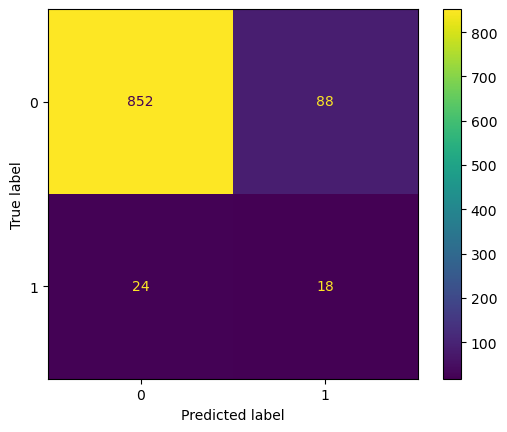

In [14]:
model,X_test_scaled,y_test = run_naive_bayes(df,12)
yhat = model.predict(X_test_scaled)
ConfusionMatrixDisplay.from_predictions(y_test,yhat)

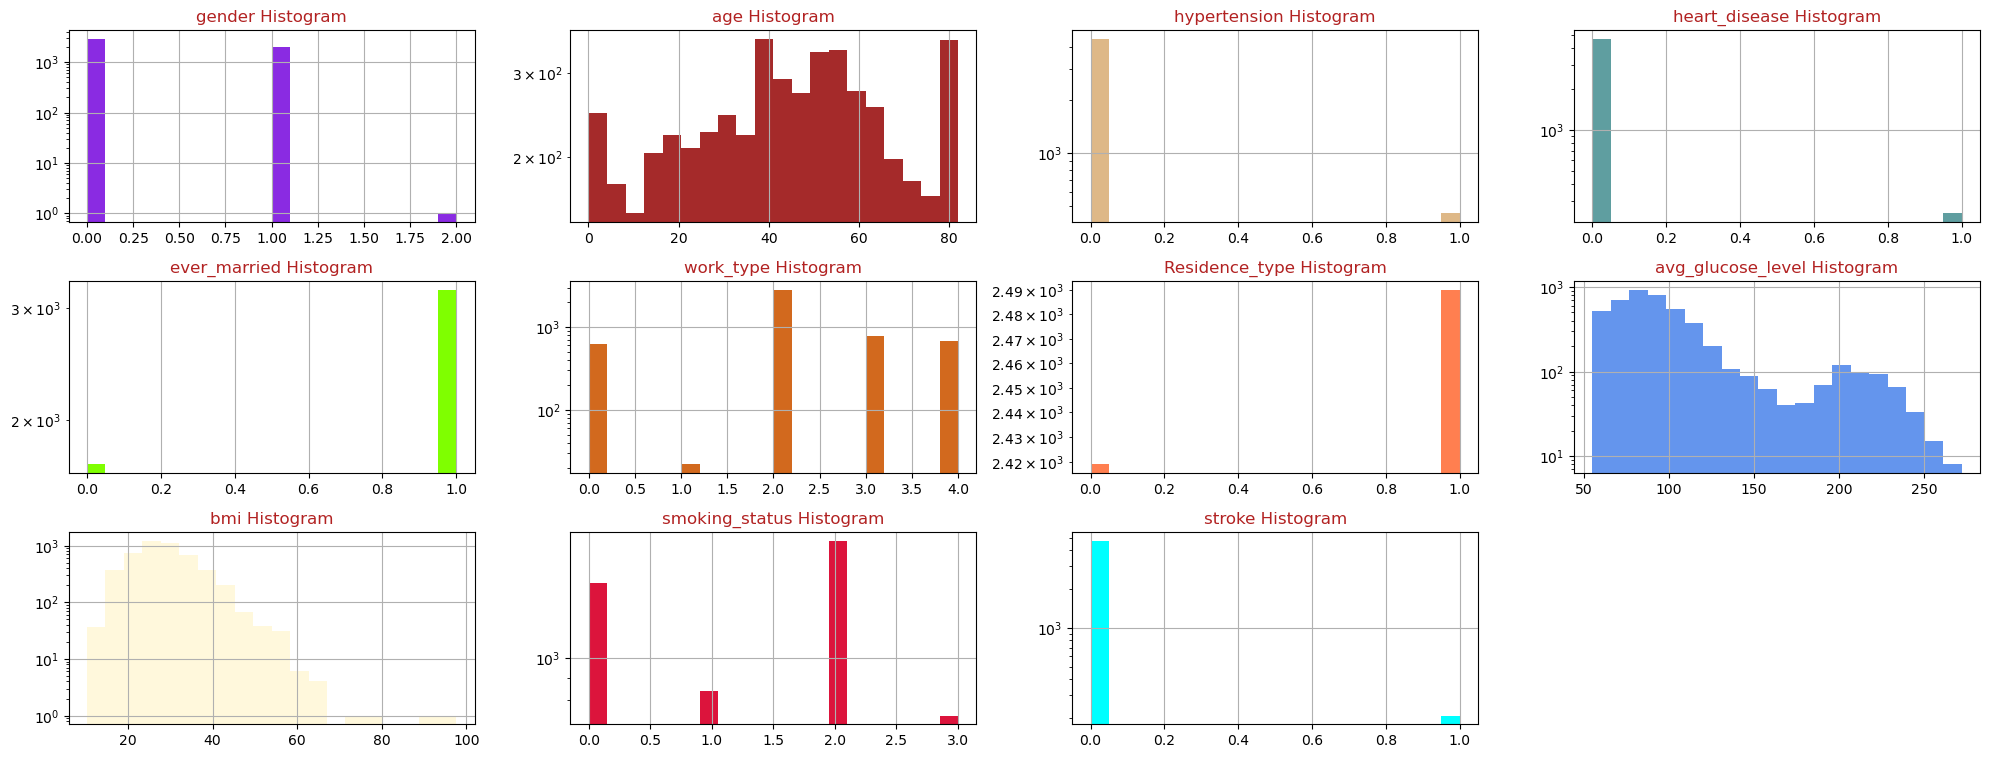

In [15]:
import matplotlib.colors as mcolors
colors = list(mcolors.CSS4_COLORS.keys())[10:]
fig = plt.figure(figsize=(20,20))
for i, feature in enumerate(df.columns):
    f = fig.add_subplot(8, 4, i + 1)
    df[feature].hist(bins = 20, ax = f, facecolor = colors[i])
    f.set_title(feature + " Histogram", color = colors[35])
    f.set_yscale('log')
fig.tight_layout()
plt.show()

In [16]:
print(classification_report(y_test,yhat))
print('Accuracy Score: ',accuracy_score(y_test,yhat))
print('F1 Score: ',f1_score(y_test, yhat))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94       940
           1       0.17      0.43      0.24        42

    accuracy                           0.89       982
   macro avg       0.57      0.67      0.59       982
weighted avg       0.94      0.89      0.91       982

Accuracy Score:  0.8859470468431772
F1 Score:  0.24324324324324323


### Random Forest


In [17]:
#get the data
y = df.iloc[:,df.columns == 'stroke']
X = df.iloc[:, df.columns != 'stroke']
#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=12, stratify=y)
scaler = preprocessing.StandardScaler().fit(X_train)
#scale data for better results
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

In [18]:
def run_model(model_type, X_train_scaled, y_train, X_test_scaled, y_test):    
    #train a model
    match model_type:
        case "logistic regression":
            model = LogisticRegression();
        case "gaussianNB":
            model = GaussianNB();
        case "random forest":
            model = RandomForestClassifier();
        
    model.fit(X_train_scaled, y_train.values.ravel())
    train_accuracy = model.score(X_train_scaled, y_train)
    print(f'The accuracy for the training set of {model_type} model is {100 * train_accuracy:.2f}%')
    test_accuracy = model.score(X_test_scaled, y_test)
    print(f'The accuracy for the test set of {model_type} model is {100 * test_accuracy:.2f}%')
    #return so we can do coffusion matrix
    return model

def display_confusion_matrix(yhat, y_test):
    cm = confusion_matrix(y_test, yhat, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.magma)
    
def print_classification_report(yhat, y_test):
    print(classification_report(y_test,yhat))
    print('Accuracy Score: ',accuracy_score(y_test,yhat))
    print('F1 Score: ',f1_score(y_test, yhat))

In [19]:
random_forest_model = run_model("random forest", X_train_scaled, y_train, X_test_scaled, y_test)

The accuracy for the training set of random forest model is 100.00%
The accuracy for the test set of random forest model is 95.52%


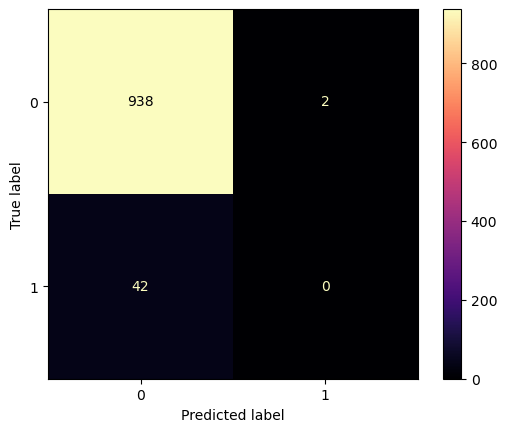

In [20]:
random_forest_yhat = random_forest_model.predict(X_test_scaled)
display_confusion_matrix(random_forest_yhat, y_test)

In [21]:
print_classification_report(random_forest_yhat, y_test)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       940
           1       0.00      0.00      0.00        42

    accuracy                           0.96       982
   macro avg       0.48      0.50      0.49       982
weighted avg       0.92      0.96      0.94       982

Accuracy Score:  0.955193482688391
F1 Score:  0.0


The accuracy of the model looks very good, at 95.52%. However, it seems like there are still a lot of misclassifications. We should take a look at our train set and see if there is anything that can be the reason.

In [22]:
y_train

,stroke
123,1
4085,0
1857,0
4205,0
3769,0
...,...
4165,0
7,1
2307,0
2570,0


In [23]:
y_train.sum()

stroke    167
dtype: int64

There are 3972 cases in the train set but there are ony 167 cases that have stroke. Our train set is heavily unbalanced at a ratio of 1:25. We can try to use SMOTE (Synthetic Minority Oversampling Technique) to balance it.

In [24]:
sm = SMOTE(random_state=2)
X_train_smote, y_train_smote = sm.fit_resample(X_train_scaled, y_train)

In [25]:
y_train_smote

,stroke
0,1
1,0
2,0
3,0
4,0
...,...
7515,1
7516,1
7517,1
7518,1


In [26]:
y_train_smote.sum()

stroke    3760
dtype: int64

The new oversampling set looks balanced. Now we can try to run our model once again:

In [27]:
random_forest_model = run_model("random forest", X_train_smote, y_train_smote, X_test_scaled, y_test)

The accuracy for the training set of random forest model is 100.00%
The accuracy for the test set of random forest model is 93.18%


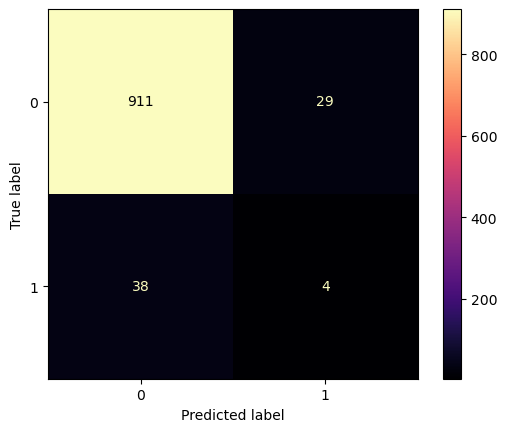

In [28]:
random_forest_yhat = random_forest_model.predict(X_test_scaled)
display_confusion_matrix(random_forest_yhat, y_test)

In [29]:
print_classification_report(random_forest_yhat, y_test)

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       940
           1       0.12      0.10      0.11        42

    accuracy                           0.93       982
   macro avg       0.54      0.53      0.54       982
weighted avg       0.92      0.93      0.93       982

Accuracy Score:  0.9317718940936863
F1 Score:  0.10666666666666667


With the new set, our Random forest model has a lower accuracy of 93.18% but it can now also predict some true negative values.